In [1]:
import os
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

sys.path.insert(0, '../../../methods')
from music import *

In [2]:
snr_list = [-20,-15,-10,-5,0,5,10,15,20,25,30]
T_list = [100,200,500,1000,2000,5000,10000]
rmse_list1 = []
rmse_list2 = []

for snr in snr_list:
    # load data
    data = np.load(f'../../../data/experiment_1/scenario_1/data_test_snr{snr}_t1000.npy', allow_pickle=True)

    # get labels and data seperately
    truths = [s['label'] for s in data]
    data = [s['cm'] for s in data]

    truths = np.stack(truths)
    data = np.stack(data)
    truths = truths.squeeze(2)

    # apply music algorithm
    M = 7
    N = 4
    res = 1
    preds = np.zeros((data.shape[0],N))

    for i in range(data.shape[0]):
        R = data[i,:,:]
        sensor_pos = np.zeros((M,3))
        sensor_pos[:,0] = np.array([1,2,3,6,10,14,16])*0.5

        preds[i,:], spectrum = music(R,M,N,sensor_pos,res)
        preds[i,:] = np.sort(preds[i,:])
        truths[i,:] = np.sort(truths[i,:])

        if snr==10 and i==0:
             np.save(f'../../../results/experiment_1/scenario_1/music_spectrum_{truths[0]}deg.npy', spectrum)
    
    rmse = np.sqrt(np.mean((truths-preds)**2))
    rmse_list1.append(rmse)
    
    print(f"snr {snr}dB, T {1000}, test-rmse {rmse:.4f}")
    
    np.save(f'../../../results/experiment_1/scenario_1/music_preds_snr{snr}_t1000.npy', preds)
    np.save(f'../../../results/experiment_1/scenario_1/music_truths_snr{snr}_t1000.npy', truths)
    
for T in T_list:
    # load data
    data = np.load(f'../../../data/experiment_1/scenario_1/data_test_snr-10_t{T}.npy', allow_pickle=True)

    # get labels and data seperately
    truths = [s['label'] for s in data]
    data = [s['cm'] for s in data]

    truths = np.stack(truths)
    data = np.stack(data)
    truths = truths.squeeze(2)

    # apply music algorithm
    M = 7
    N = 4
    res = 1
    preds = np.zeros((data.shape[0],N))

    for i in range(data.shape[0]):
        R = data[i,:,:]
        sensor_pos = np.zeros((M,3))
        sensor_pos[:,0] = np.array([1,2,3,6,10,14,16])*0.5

        preds[i,:], spectrum = music(R,M,N,sensor_pos,res)
        preds[i,:] = np.sort(preds[i,:])
        truths[i,:] = np.sort(truths[i,:])

    rmse = np.sqrt(np.mean((truths-preds)**2))
    rmse_list2.append(rmse)
    
    print(f"snr -10dB, T {T}, test-rmse {rmse:.4f}")
    
    np.save(f'../../../results/experiment_1/scenario_1/music_preds_snr-10_t{T}.npy', preds)
    np.save(f'../../../results/experiment_1/scenario_1/music_truths_snr-10_t{T}.npy', truths)
    
np.save('../../../results/experiment_1/scenario_1/music_rmse1.npy', rmse_list1)
np.save('../../../results/experiment_1/scenario_1/music_rmse2.npy', rmse_list2)

snr -20dB, T 1000, test-rmse 18.0962
snr -15dB, T 1000, test-rmse 8.1708
snr -10dB, T 1000, test-rmse 0.4914
snr -5dB, T 1000, test-rmse 0.3513
snr 0dB, T 1000, test-rmse 0.3411
snr 5dB, T 1000, test-rmse 0.3358
snr 10dB, T 1000, test-rmse 0.3358
snr 15dB, T 1000, test-rmse 0.3358
snr 20dB, T 1000, test-rmse 0.3358
snr 25dB, T 1000, test-rmse 0.3359
snr 30dB, T 1000, test-rmse 0.3359
snr -10dB, T 100, test-rmse 10.6641
snr -10dB, T 200, test-rmse 9.0760
snr -10dB, T 500, test-rmse 0.5728
snr -10dB, T 1000, test-rmse 0.4914
snr -10dB, T 2000, test-rmse 0.3678
snr -10dB, T 5000, test-rmse 0.3327
snr -10dB, T 10000, test-rmse 0.3250


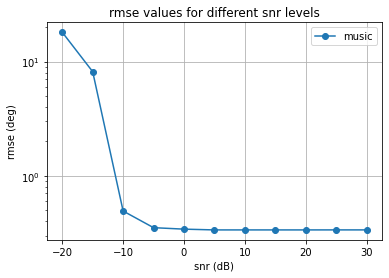

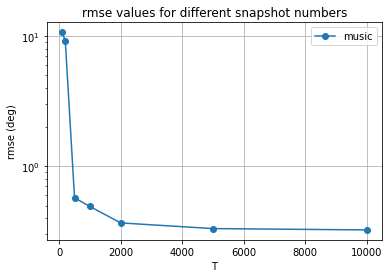

In [3]:
# plot rmse values
plt.figure()
plt.plot(snr_list, rmse_list1, '-o')
plt.title("rmse values for different snr levels")
plt.xlabel("snr (dB)")
plt.ylabel("rmse (deg)")
plt.legend(['music'])
plt.yscale("log")
plt.grid()

plt.figure()
plt.plot(T_list, rmse_list2, '-o')
plt.title("rmse values for different snapshot numbers")
plt.xlabel("T")
plt.ylabel("rmse (deg)")
plt.legend(['music'])
plt.yscale("log")
plt.grid()